In [1]:
# Monte carlo implementation of Euler problem 84
board <- 0:39

roll_dice <- function() {
  x <- sample(1:4, 2, replace = TRUE)
  return(x)
}

draw_cc <- function(prev_draws) {
  possible_cards <- c(0, 10, -1:-14)
  
  if (!is.null(prev_draws)) {
     possible_cards <- setdiff(possible_cards, prev_draws)
  }
   # If the previous draws are less than all the cards we do not know the order, and therefore we sample randomly. 
  if (length(prev_draws) < 16) {
    x <- sample(possible_cards, 1)
    # Add this draw to the list of previous draws
    prev_draws <- c(prev_draws, x)
  } else {
    # Draw top card (1st)
    x <- prev_draws[1]
    # Replace at bottom (nth)
    prev_draws <- c(prev_draws[-1], prev_draws[1])
  }
  return(list(draw = x, prev_cc_draws = prev_draws))
}

draw_ch <- function(prev_draws, curr_pos) {
  
  mround <- function(x,base){
    base*ceiling(x/base)
  }
  
  u_p <- c(12, 28)
  
  nearest_rail <- mround(curr_pos, 5)
  dist <- u_p - curr_pos
  
  if (all(dist < 0)) {
    nearest_u <- u_p[1]
  } else {
    nearest_u <- u_p[which(dist %in% min(dist[dist >= 0]))]
  }
  possible_cards <- c(0, 10, 11, 24, 39, 4, rep(nearest_rail, 2), nearest_u, curr_pos - 3, -1:-6)
  
  if (!is.null(prev_draws)) {
    possible_cards <- setdiff(possible_cards, prev_draws)
  }
  # If the previous draws are less than all the cards we do not know the order, and therefore we sample randomly. 
  if (length(prev_draws) < 16) {
    x <- sample(possible_cards, 1)
    # Add this draw to the list of previous draws
    prev_draws <- c(prev_draws, x)
  } else {
    # Draw top card (1st)
    x <- prev_draws[1]
    # Replace at bottom (nth)
    prev_draws <- c(prev_draws[-1], x)
  }
  return(list(draw = x, prev_ch_draws = prev_draws))
}


take_action <- function(curr_pos, prev_cc_draws, prev_ch_draws) {
  
  if (curr_pos %in% c(2, 17, 33)) {
    draw <- draw_cc(prev_cc_draws)
    prev_cc_draws <- draw$prev_cc_draws 
    if (draw$draw >= 0) {
      curr_pos <- draw$draw
    } else {
      return(list(curr_pos = curr_pos, prev_cc_draws = prev_cc_draws, prev_ch_draws = prev_ch_draws))
    }
    
  } else if (curr_pos %in% c(7, 22, 36)) {
    draw <- draw_ch(prev_ch_draws, curr_pos)
    prev_ch_draws <- draw$prev_draws 
    
    if (draw$draw >= 0) {
      curr_pos <- draw$draw
    } else {
      return(list(curr_pos = curr_pos, prev_cc_draws = prev_cc_draws, prev_ch_draws = prev_ch_draws))
    }
    
  } else if (curr_pos == 30) {
      curr_pos <- 10
  } else {
    return(list(curr_pos = curr_pos, prev_cc_draws = prev_cc_draws, prev_ch_draws = prev_ch_draws))
  }
  take_action(curr_pos, prev_cc_draws, prev_ch_draws)
}

adj_curr_pos <- function(curr_pos) {
  if (curr_pos > 39) {
    curr_pos <- curr_pos - 40
  }
  return(curr_pos)
}

take_turn <- function(curr_pos, prev_cc_draws, prev_ch_draws, double_count) { 
  
    roll <- roll_dice()
  
    if (roll[1] == roll[2]) {
      double_count <- double_count + 1
      if (double_count == 3) {
        # i.e. you've rolled 3 doubles, go to jail
        curr_pos <- 10
        return(list(curr_pos = curr_pos, prev_cc_draws = prev_cc_draws, prev_ch_draws = prev_ch_draws, double_count = 0))
      }
    } else {
      double_count <- 0
    }

    curr_pos <- curr_pos + sum(roll)
    curr_pos <- adj_curr_pos(curr_pos)
    # Take action
    outcome <- take_action(curr_pos, prev_cc_draws, prev_ch_draws)
    prev_cc_draws <- outcome$prev_cc_draws
    prev_ch_draws <- outcome$prev_ch_draws
    curr_pos <- outcome$curr_pos

    roll <- roll_dice()
    curr_pos <- curr_pos + sum(roll)
    curr_pos <- adj_curr_pos(curr_pos)
    # Take action 
    outcome <- take_action(curr_pos, prev_cc_draws, prev_ch_draws)
    prev_cc_draws <- outcome$prev_cc_draws
    prev_ch_draws <- outcome$prev_ch_draws
    curr_pos <- outcome$curr_pos
      
    return(list(curr_pos = curr_pos, prev_cc_draws = prev_cc_draws, prev_ch_draws = prev_ch_draws, double_count = double_count))
}

monte_carlo <- function(inner_scen) {
  all_positions <- c()
  curr_pos <- 0
  prev_cc_draws <- c()
  prev_ch_draws <- c()
  double_count <- 0
   for (j in 1:inner_scen) {
      res <- take_turn(curr_pos, prev_cc_draws, prev_ch_draws, double_count)
      prev_cc_draws <- res$prev_cc_draws
      prev_ch_draws <- res$prev_ch_draws
      curr_pos <- res$curr_pos
      all_positions[j] <- curr_pos 
      double_count <- res$double_count
    }
  return(all_positions)
}

[1] 10 24 15 16 19 20 25 21 18 23 28  4 30  0 14 29 17 31 26 27 38 11 13 12  5
[26] 32  6  8 33  9 36 37  3 34  1  2 22  7 35 39

sims
       0        1        2        3        4        5        6        7 
0.028099 0.017912 0.017208 0.020768 0.028249 0.022958 0.022016 0.008124 
       8        9       10       11       12       13       14       15 
0.021997 0.021644 0.073574 0.024639 0.023978 0.024284 0.027594 0.031680 
      16       17       18       19       20       21       22       23 
0.031385 0.026296 0.029836 0.030950 0.030625 0.030365 0.011225 0.029509 
      24       25       26       27       28       29       31       32 
0.032218 0.030369 0.025527 0.025175 0.028533 0.027428 0.028180 0.026035 
      33       34       35       36       37       38       39       40 
0.022124 0.021799 0.019631 0.007874 0.021497 0.020832 0.025150 0.002713 

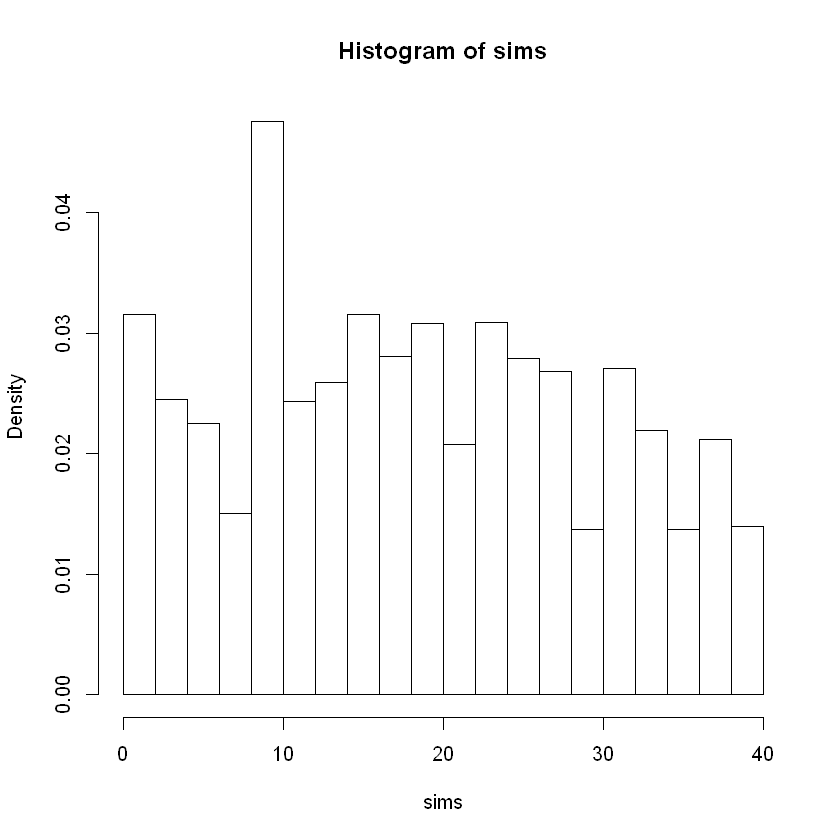

In [2]:
sims <- monte_carlo(1000000)
order(table(sims), decreasing = TRUE) - 1
hist(sims, prob = TRUE)
table(sims) / 1000000